# Deep learning Spring 2025

- **Name:** `Ali Zahedzadeh`
- **Student ID:** `4021305965003`



---



- **Name:** `Peyman Naseri`
- **Student ID:** `4011305965014`



<hr>

### **<font face="Courier New" color="blue" size="+3">Question 2: Predicting Suicidal Thoughts on Social Media**



#### <font face="Verdana" color="green" size="+2">**2.1. Preprocessing (30 points)**




In [ ]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Make sure you have downloaded the necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove Punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 3. Remove Special Characters and Non-Alphabetic Characters
    text = re.sub(r'[^a-z\s]', '', text)

    # 4. Tokenize
    tokens = nltk.word_tokenize(text)

    # 5. Remove Stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 6. Remove Duplicate Words (Keep unique words only, but preserve order)
    seen = set()
    tokens = [x for x in tokens if not (x in seen or seen.add(x))]

    # 7. Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 8. Join back to string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
text1 = """my life is meaningless i just want to end my life so badly my life is completely empty
and i dont want to have to create meaning in it creating meaning is pain how long will i
hold back the urge to run my car head first into the next person coming the opposite
way when will i stop feeling jealous of tragic characters like gomer pile for the swift end
they were able to bring to their lives"""

preprocessed_text1 = preprocess_text(text1)
print(preprocessed_text1)


life meaningless want end badly completely empty dont create meaning creating pain long hold back urge run car head first next person coming opposite way stop feeling jealous tragic character like gomer pile swift able bring life


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Deep-Teias/HW03/twitter-suicidal_data.csv')

# Show basic info
df.head()

,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9119 entries, 0 to 9118
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9119 non-null   object
 1   intention  9119 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 142.6+ KB


In [ ]:
# Apply the preprocessing function we built earlier
df['cleaned_tweet'] = df['tweet'].apply(preprocess_text)


df[['tweet', 'cleaned_tweet', 'intention']].head()

,tweet,cleaned_tweet,intention
0,my life is meaningless i just want to end my l...,life meaningless want end badly completely emp...,1
1,muttering i wanna die to myself daily for a fe...,muttering wan na die daily month feel worthles...,1
2,work slave i really feel like my only purpose ...,work slave really feel like purpose life make ...,1
3,i did something on the 2 of october i overdose...,something october overdosed felt alone horribl...,1
4,i feel like no one cares i just want to die ma...,feel like one care want die maybe less lonely,1


In [ ]:
df['intention'].value_counts()

,count
intention,
0,5121
1,3998


#### <font face="Verdana" color="green" size="+2">**2.2. Construct Embedding Matrix (10 points)**




In [ ]:
! pip install gensim

In [ ]:
import numpy as np
import gensim.downloader as api
from tensorflow.keras.preprocessing.text import Tokenizer

# Load the Word2Vec model (Google News vectors)
print("Loading Word2Vec model...")
word2vec = api.load('word2vec-google-news-300')

# Tokenize texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cleaned_tweet'])  # cleaned tweets from part 2-1

word_index = tokenizer.word_index
vocab_size = len(word_index) + 1  # +1 for padding
embedding_dim = 300

# Build the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    if word in word2vec:
        embedding_matrix[i] = word2vec[word]
    else:
        embedding_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim,))

print(f"Embedding matrix shape: {embedding_matrix.shape}")


Loading Word2Vec model...
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Embedding matrix shape: (21937, 300)


In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.13671875,  0.1484375 ,  0.11474609, ..., -0.18261719,
         0.04443359, -0.04174805],
       [ 0.10498047, -0.03295898,  0.12402344, ..., -0.13867188,
        -0.17089844,  0.08056641],
       ...,
       [-0.01855469, -0.29101562,  0.203125  , ...,  0.14257812,
        -0.10693359,  0.07519531],
       [-0.20214844, -0.22363281,  0.11035156, ..., -0.30273438,
        -0.19335938,  0.25195312],
       [-0.03295898, -0.1640625 ,  0.06738281, ..., -0.16503906,
         0.08105469, -0.11865234]])



The embedding matrix is a **dense numerical representation** of the words in our dataset, created as follows:

- Each **row** corresponds to a **unique word** in the vocabulary built from the preprocessed tweets.
- The **columns** represent the **300-dimensional Word2Vec vector** associated with each word.
- If a word exists in the **pre-trained Word2Vec** model (`word2vec-google-news-300`), we assign its corresponding high-quality embedding.
- If a word is **not found** in Word2Vec, we initialize its vector with **random values** sampled from a normal distribution.
- This matrix is used to **map words to their semantic meanings** automatically during model training, allowing the deep learning models to understand **relationships between words** like "sad" and "depressed" being close together.

The embedding matrix thus:
- **Preserves semantic relationships**.
- **Speeds up model convergence**.
- **Improves overall classification performance** by providing a strong prior knowledge about language.




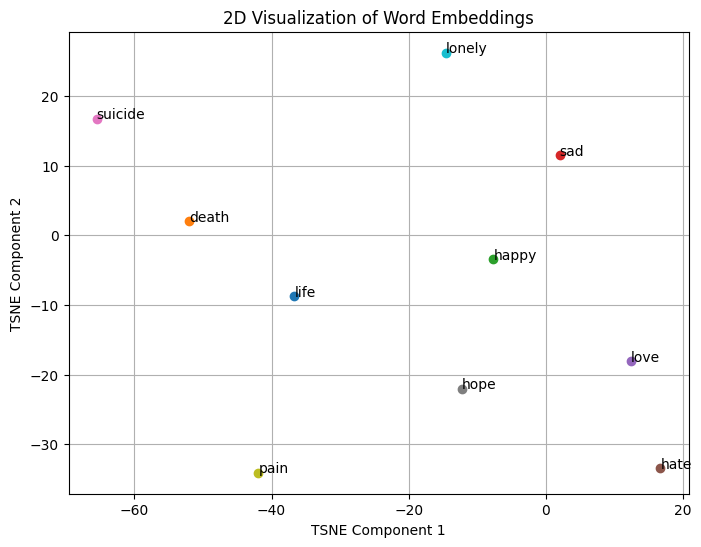

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Select some words to visualize
words_to_visualize = ['life', 'death', 'happy', 'sad', 'love', 'hate', 'suicide', 'hope', 'pain', 'lonely']

# Get the indices of these words
word_indices = [tokenizer.word_index[word] for word in words_to_visualize if word in tokenizer.word_index]

# Extract their embeddings
word_vectors = embedding_matrix[word_indices]

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plot
plt.figure(figsize=(8, 6))
for i, word in enumerate(words_to_visualize):
    if word in tokenizer.word_index:
        plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
        plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))
plt.title('2D Visualization of Word Embeddings')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.grid(True)
plt.show()


##### **Bonus Part**

In [ ]:
# Find maximum length of tweets after tokenization
all_sequences = tokenizer.texts_to_sequences(df['cleaned_tweet'])
max_sequence_length = max(len(seq) for seq in all_sequences)
print(f"Max sequence length: {max_sequence_length}")


Max sequence length: 921


In [ ]:
from tensorflow.keras.layers import Embedding

# Parameters
vocab_size = len(tokenizer.word_index) + 1  # from previous steps
embedding_dim = 300

# Trainable Embedding Layer (No pre-trained weights)
embedding_layer = Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    trainable=True
)

print("Trainable Embedding Layer created!")


Trainable Embedding Layer created!


In [ ]:
embedding_layer

<Embedding name=embedding, built=False>

#### <font face="Verdana" color="green" size="+2">**2.3. Train Deep Learning Models (50 points)**




##### **Simple 1-layer LSTM**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import gensim.downloader as api

###### **Preprocessing**

In [ ]:
texts = df['cleaned_tweet']
labels = df['intention'].values

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding
max_sequence_length = 100
X = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Train / Validation / Test Split
X_temp, X_test, y_temp, y_test = train_test_split(X, labels, test_size=0.15, random_state=42, stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

Train: (6382, 100), Validation: (1369, 100), Test: (1368, 100)


######**Build Two Embedding Layers**

In [ ]:
# Vocabulary and Embedding Dimension
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 300

# Build Embedding Matrix using Word2Vec
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in word2vec:
        embedding_matrix[i] = word2vec[word]
    else:
        embedding_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim,))

print(f"Embedding matrix shape: {embedding_matrix.shape}")


#  Embedding Layer with Word2Vec
embedding_layer_word2vec = Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    trainable=True  # fine-tune allowed
)

#  Embedding Layer with Random Initialization
embedding_layer_random = Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    trainable=True  # start random, learn from scratch
)


Embedding matrix shape: (21937, 300)


###### **Build Both 1-Layer LSTM Models**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

#  Model 1A: 1-Layer LSTM with Word2Vec Embedding
model_1a = Sequential([
    embedding_layer_word2vec,
    LSTM(100),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_1a.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_1a.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ ?                      │     6,581,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,581,100 (25.10 MB)

 Trainable params: 6,581,100 (25.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 2️⃣ Model 1B: 1-Layer LSTM with Random Trainable Embedding
model_1b = Sequential([
    embedding_layer_random,
    LSTM(100),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_1b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_1b.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

###### **Train Both Models**

In [ ]:
# 1️⃣ Train Model 1A: 1-Layer LSTM with Word2Vec
history_1a = model_1a.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64
)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6544 - loss: 0.6327 - val_accuracy: 0.6581 - val_loss: 0.6023
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7747 - loss: 0.4994 - val_accuracy: 0.8707 - val_loss: 0.3372
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8914 - loss: 0.2995 - val_accuracy: 0.9123 - val_loss: 0.2386
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9287 - loss: 0.2309 - val_accuracy: 0.9196 - val_loss: 0.2367
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9247 - loss: 0.2297 - val_accuracy: 0.8839 - val_loss: 0.3261
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8744 - loss: 0.3643 - val_accuracy: 0.8758 - val_loss: 0.3398
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8706 - loss: 0.3211 - val_accuracy: 0.9050 - val_loss: 0.2558
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9329 - loss: 0.2098 - val_accu

In [ ]:
# 2️⃣ Train Model 1B: 1-Layer LSTM with Random Embedding
history_1b = model_1b.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64
)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6587 - loss: 0.6296 - val_accuracy: 0.7407 - val_loss: 0.5217
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7154 - loss: 0.5809 - val_accuracy: 0.6421 - val_loss: 0.6532
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6469 - loss: 0.6348 - val_accuracy: 0.8050 - val_loss: 0.7168
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7694 - loss: 0.5644 - val_accuracy: 0.8714 - val_loss: 0.3675
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8632 - loss: 0.3778 - val_accuracy: 0.8904 - val_loss: 0.2892
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9124 - loss: 0.2637 - val_accuracy: 0.8999 - val_loss: 0.2707
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9323 - loss: 0.2176 - val_accuracy: 0.9072 - val_loss: 0.2766
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9454 - loss: 0.1903 - val_accu

###### **Plot Training and Validation Curves**

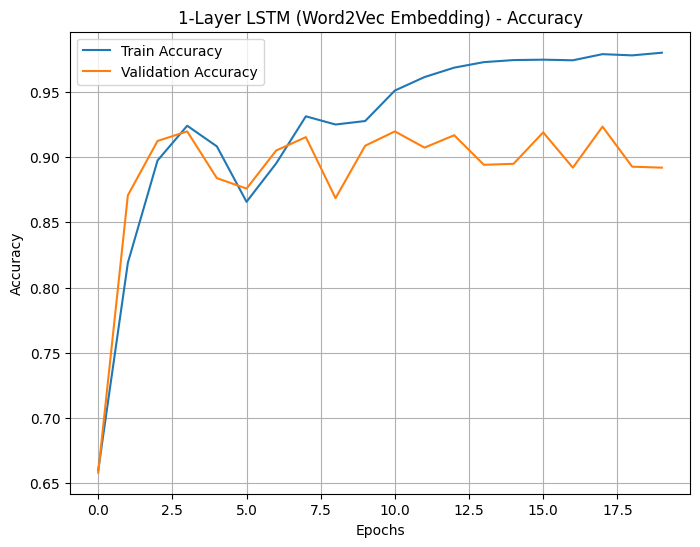

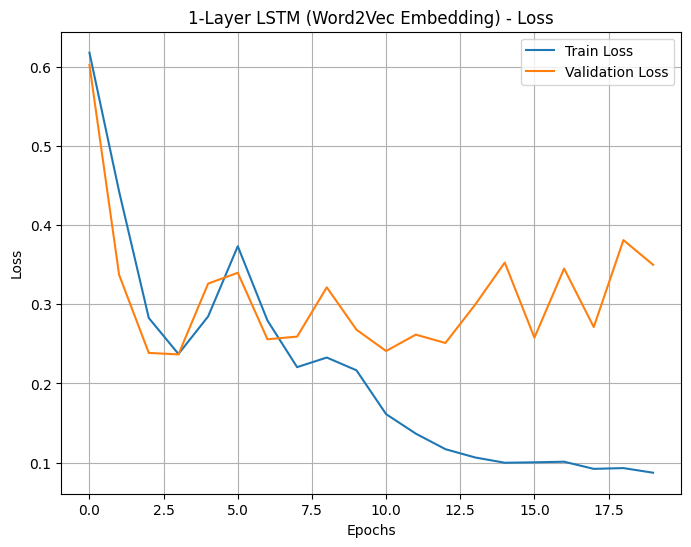

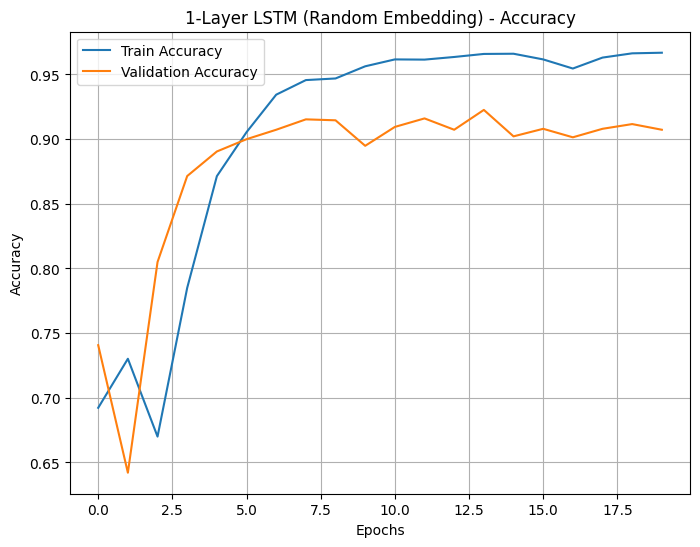

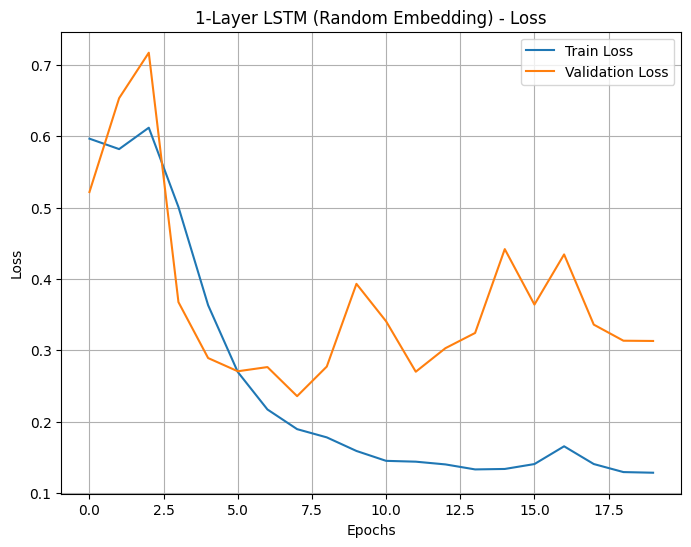

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    # Accuracy Plot
    plt.figure(figsize=(8,6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Loss Plot
    plt.figure(figsize=(8,6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# --------------------------------------
# Plot for Model 1A (Word2Vec Embedding)
plot_history(history_1a, "1-Layer LSTM (Word2Vec Embedding)")

# Plot for Model 1B (Random Embedding)
plot_history(history_1b, "1-Layer LSTM (Random Embedding)")


###### **Evaluate Both Models (Accuracy, Precision, Recall, F1)**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test, model_name):
    # Predict
    y_pred_probs = model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\nEvaluation for {model_name}:")
    print(f"Test Accuracy:  {acc:.4f}")
    print(f"Test Precision: {prec:.4f}")
    print(f"Test Recall:    {rec:.4f}")
    print(f"Test F1-Score:  {f1:.4f}")

# --------------------------------------
# Evaluate Model 1A (Word2Vec Embedding)
evaluate_model(model_1a, X_test, y_test, "1-Layer LSTM (Word2Vec Embedding)")

# Evaluate Model 1B (Random Embedding)
evaluate_model(model_1b, X_test, y_test, "1-Layer LSTM (Random Embedding)")


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

Evaluation for 1-Layer LSTM (Word2Vec Embedding):
Test Accuracy:  0.8787
Test Precision: 0.8489
Test Recall:    0.8800
Test F1-Score:  0.8642
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Evaluation for 1-Layer LSTM (Random Embedding):
Test Accuracy:  0.8852
Test Precision: 0.8826
Test Recall:    0.8517
Test F1-Score:  0.8668


###### **Plot Confusion Matrices**

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


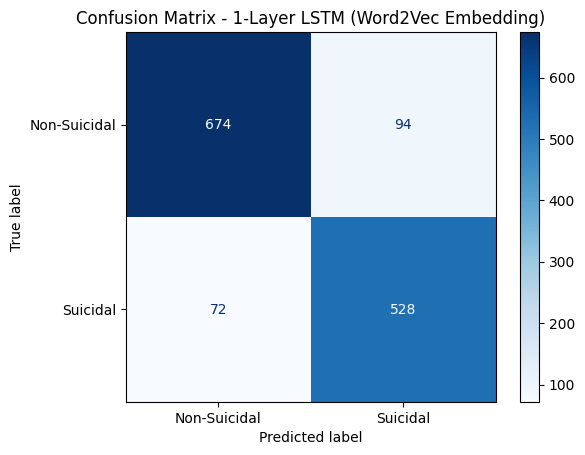

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


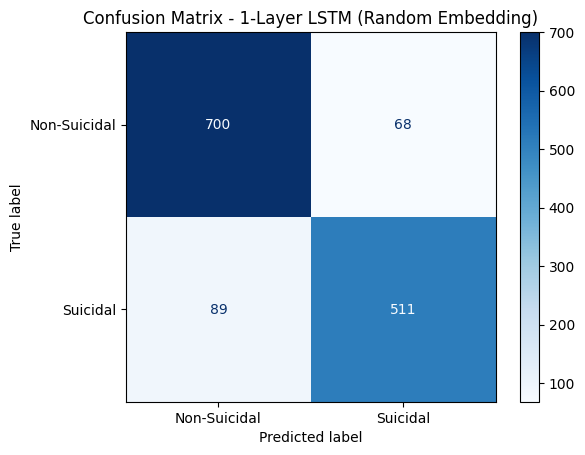

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion(model, X_test, y_test, model_name):
    # Predict
    y_pred_probs = model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Suicidal', 'Suicidal'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.grid(False)
    plt.show()

# --------------------------------------
# Plot for Model 1A (Word2Vec Embedding)
plot_confusion(model_1a, X_test, y_test, "1-Layer LSTM (Word2Vec Embedding)")

# Plot for Model 1B (Random Embedding)
plot_confusion(model_1b, X_test, y_test, "1-Layer LSTM (Random Embedding)")


##### **Simple 2-Layer LSTM**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import gensim.downloader as api

###### **Build Both 2-Layer LSTM Models**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# 1️⃣ Model 2A: 2-Layer LSTM with Word2Vec Embedding
model_2a = Sequential([
    embedding_layer_word2vec,      # Preloaded layer (non-trainable)
    LSTM(100, return_sequences=True),
    Dropout(0.5),
    LSTM(50),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model_2a.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2a.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (None, 100, 300)       │     6,581,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,581,100 (25.10 MB)

 Trainable params: 6,581,100 (25.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_2b = Sequential([
    embedding_layer_random,        # Trainable random embedding
    LSTM(100, return_sequences=True),
    Dropout(0.5),
    LSTM(50),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model_2b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2b.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ (None, 100, 300)       │     6,581,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,581,100 (25.10 MB)

 Trainable params: 6,581,100 (25.10 MB)

 Non-trainable params: 0 (0.00 B)

###### **Train Both Models**

In [ ]:
# 1️⃣ Train Model 2A: Word2Vec Embedding
history_2a = model_2a.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64
)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.7208 - loss: 0.5536 - val_accuracy: 0.7275 - val_loss: 0.5175
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7867 - loss: 0.4713 - val_accuracy: 0.8766 - val_loss: 0.2909
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9588 - loss: 0.1771 - val_accuracy: 0.9196 - val_loss: 0.3035
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9657 - loss: 0.1448 - val_accuracy: 0.9196 - val_loss: 0.3287
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9642 - loss: 0.1405 - val_accuracy: 0.9182 - val_loss: 0.3271
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9655 - loss: 0.1385 - val_accuracy: 0.9145 - val_loss: 0.3584
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9606 - loss: 0.1503 - val_accuracy: 0.9189 - val_loss: 0.3267
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9627 - loss: 0.1422 - val_accu

In [ ]:
# 2️⃣ Train Model 2B: Random Embedding
history_2b = model_2b.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64
)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.6558 - loss: 0.6398 - val_accuracy: 0.5617 - val_loss: 0.6753
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6458 - loss: 0.5889 - val_accuracy: 0.9138 - val_loss: 0.2440
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9571 - loss: 0.1583 - val_accuracy: 0.9065 - val_loss: 0.2884
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9686 - loss: 0.1249 - val_accuracy: 0.9094 - val_loss: 0.3937
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9689 - loss: 0.1295 - val_accuracy: 0.9050 - val_loss: 0.3270
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9697 - loss: 0.1201 - val_accuracy: 0.9123 - val_loss: 0.3328
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9698 - loss: 0.1221 - val_accuracy: 0.9145 - val_loss: 0.3332
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9753 - loss: 0.1045 - val_accu

###### **Plot Training and Validation Curves**

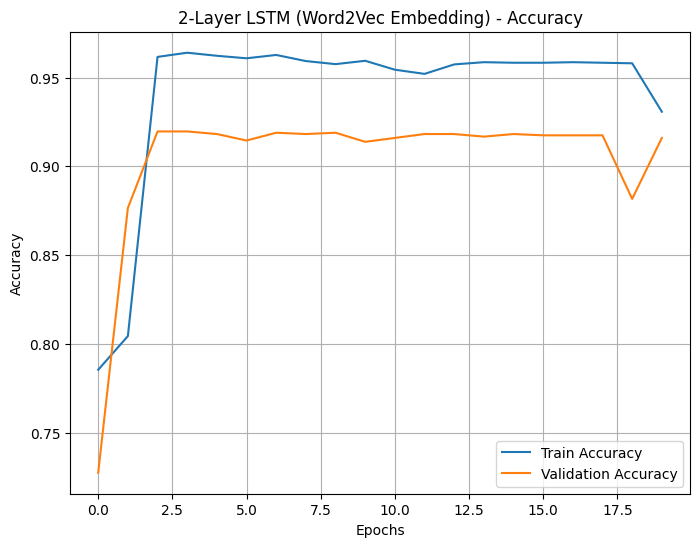

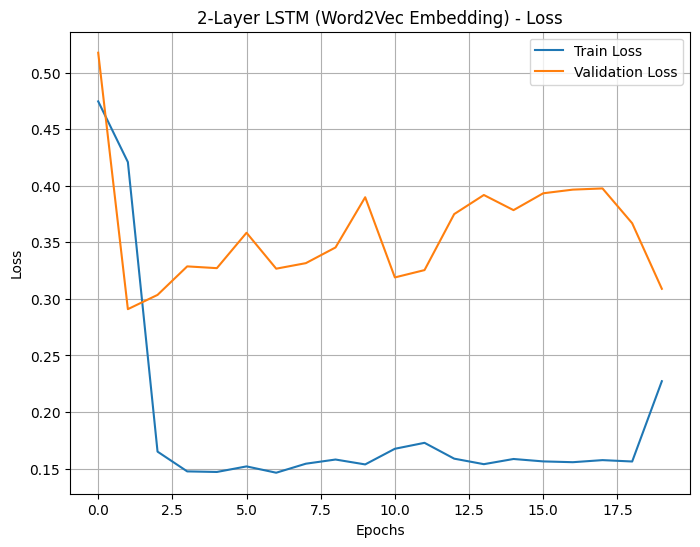

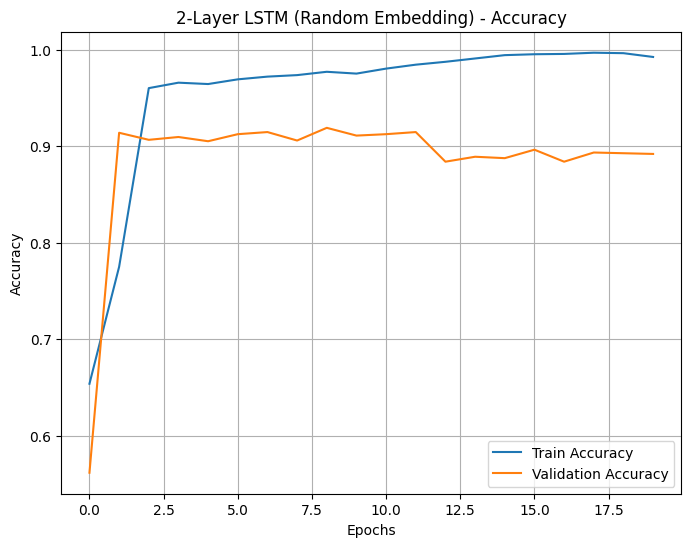

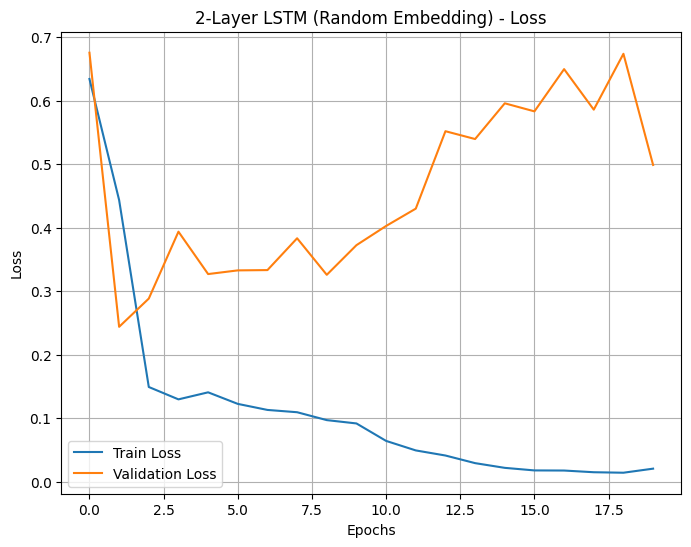

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    # Accuracy
    plt.figure(figsize=(8,6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Loss
    plt.figure(figsize=(8,6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for Word2Vec Model
plot_history(history_2a, "2-Layer LSTM (Word2Vec Embedding)")

# Plot for Random Embedding Model
plot_history(history_2b, "2-Layer LSTM (Random Embedding)")


###### **Evaluate Both Models (Accuracy, Precision, Recall, F1)**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test, model_name):
    y_pred_probs = model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n📌 Evaluation for {model_name}:")
    print(f"✔️ Accuracy:  {acc:.4f}")
    print(f"✔️ Precision: {prec:.4f}")
    print(f"✔️ Recall:    {rec:.4f}")
    print(f"✔️ F1-Score:  {f1:.4f}")

# --------------------------------------
# Evaluate Word2Vec Model
evaluate_model(model_2a, X_test, y_test, "2-Layer LSTM (Word2Vec Embedding)")

# Evaluate Random Embedding Model
evaluate_model(model_2b, X_test, y_test, "2-Layer LSTM (Random Embedding)")


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step

📌 Evaluation for 2-Layer LSTM (Word2Vec Embedding):
✔️ Accuracy:  0.8838
✔️ Precision: 0.9565
✔️ Recall:    0.7700
✔️ F1-Score:  0.8532
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

📌 Evaluation for 2-Layer LSTM (Random Embedding):
✔️ Accuracy:  0.8794
✔️ Precision: 0.8383
✔️ Recall:    0.8983
✔️ F1-Score:  0.8673


###### **Plot Confusion Matrices**

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


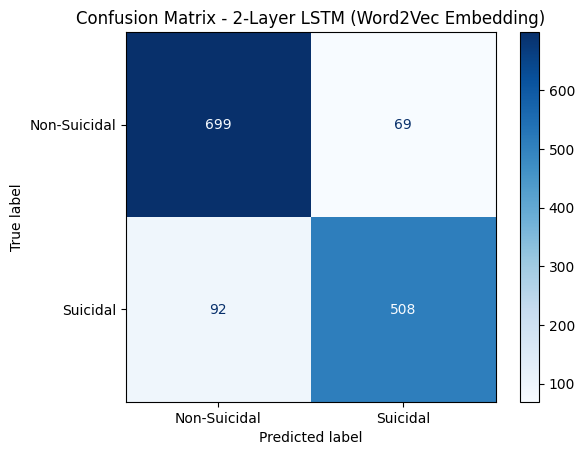

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


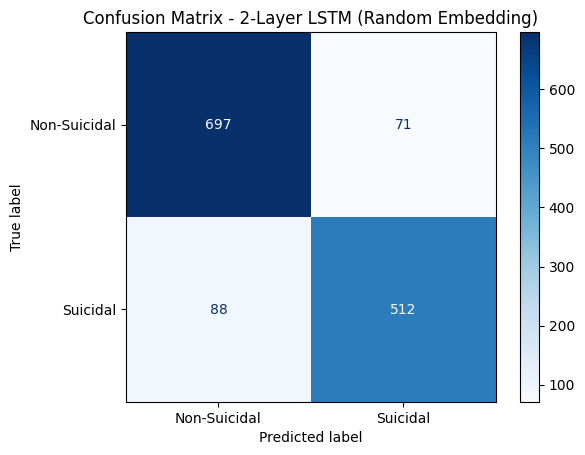

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion(model, X_test, y_test, model_name):
    y_pred_probs = model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Suicidal', 'Suicidal'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.grid(False)
    plt.show()

# --------------------------------------
# Plot Confusion Matrix for Word2Vec Model
plot_confusion(model_2a, X_test, y_test, "2-Layer LSTM (Word2Vec Embedding)")

# Plot Confusion Matrix for Random Embedding Model
plot_confusion(model_2b, X_test, y_test, "2-Layer LSTM (Random Embedding)")


##### **Stacked CNN + 2-Layer LSTM**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import gensim.downloader as api

###### **Build Both Stacked CNN + 2-Layer LSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dropout, Dense

# 1️⃣ Model 3A: Stacked CNN + 2-Layer LSTM with Word2Vec Embedding
model_3a = Sequential([
    embedding_layer_word2vec,                      # Preloaded Word2Vec embedding
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    LSTM(100, return_sequences=True),
    LSTM(50),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model_3a.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_3a.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (None, 100, 300)       │     6,581,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,581,100 (25.10 MB)

 Trainable params: 6,581,100 (25.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 2️⃣ Model 3B: Stacked CNN + 2-Layer LSTM with Random Embedding
model_3b = Sequential([
    embedding_layer_random,                        # Random trainable embedding
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    LSTM(100, return_sequences=True),
    LSTM(50),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model_3b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_3b.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ (None, 100, 300)       │     6,581,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,581,100 (25.10 MB)

 Trainable params: 6,581,100 (25.10 MB)

 Non-trainable params: 0 (0.00 B)

###### **Train Both Models**

In [ ]:
history_3a = model_3a.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64
)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.8368 - loss: 0.3639 - val_accuracy: 0.9153 - val_loss: 0.2365
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9717 - loss: 0.1079 - val_accuracy: 0.8145 - val_loss: 0.4644
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9499 - loss: 0.1271 - val_accuracy: 0.9167 - val_loss: 0.2659
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9749 - loss: 0.0849 - val_accuracy: 0.9109 - val_loss: 0.2970
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9658 - loss: 0.0999 - val_accuracy: 0.9102 - val_loss: 0.4216
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9754 - loss: 0.0890 - val_accuracy: 0.9021 - val_loss: 0.3649
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9767 - loss: 0.0987 - val_accuracy: 0.9116 - val_loss: 0.4795
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9807 - loss: 0.0911 - val_accu

In [ ]:
history_3b = model_3b.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64
)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.8279 - loss: 0.3784 - val_accuracy: 0.8985 - val_loss: 0.3488
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9788 - loss: 0.0888 - val_accuracy: 0.8941 - val_loss: 0.4018
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9629 - loss: 0.1104 - val_accuracy: 0.9036 - val_loss: 0.4843
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9751 - loss: 0.0896 - val_accuracy: 0.8999 - val_loss: 0.5035
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9682 - loss: 0.1149 - val_accuracy: 0.8649 - val_loss: 0.5730
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9727 - loss: 0.1206 - val_accuracy: 0.8663 - val_loss: 0.5124
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9739 - loss: 0.1207 - val_accuracy: 0.8809 - val_loss: 0.4935
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9795 - loss: 0.0900 - val_accu

###### **Plot Training and Validation Curves**

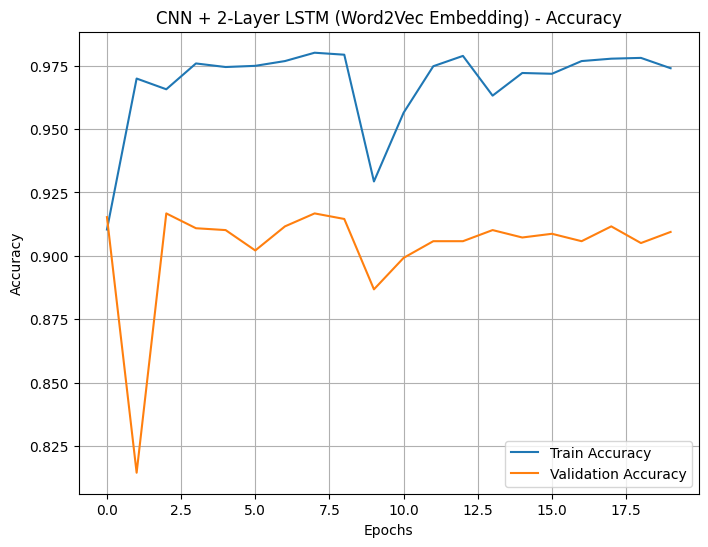

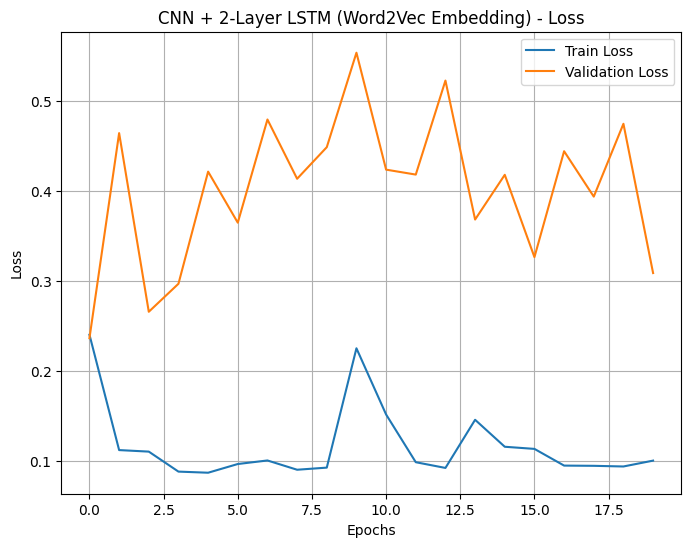

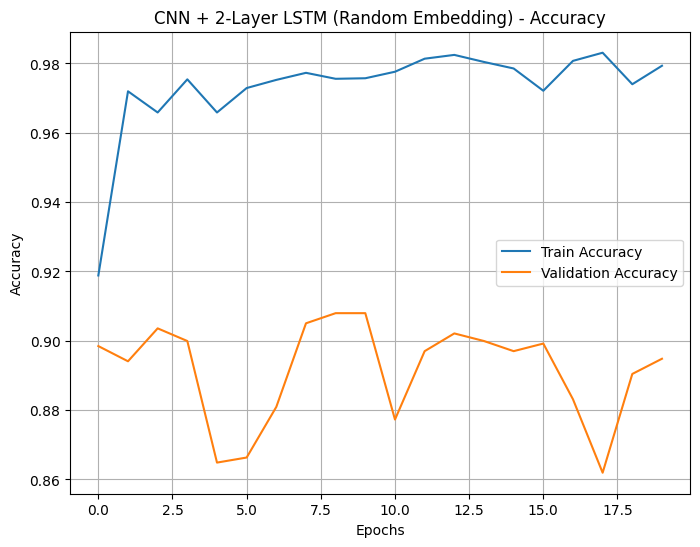

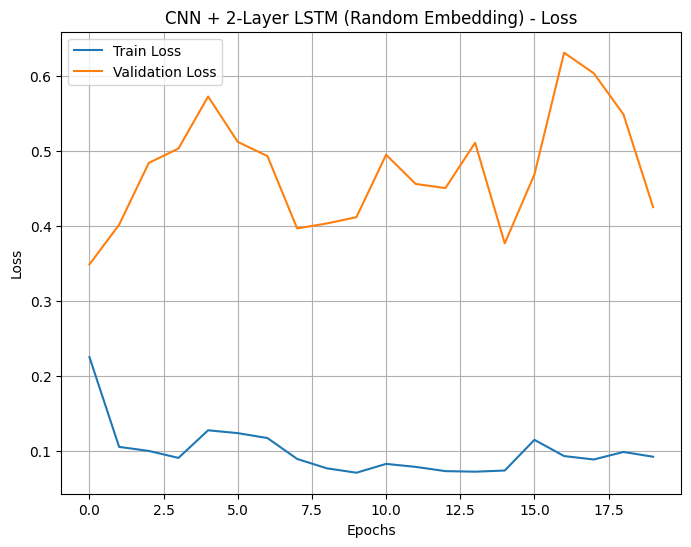

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    # Accuracy
    plt.figure(figsize=(8,6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Loss
    plt.figure(figsize=(8,6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# ----------------------------------------
# Plot for Word2Vec Model
plot_history(history_3a, "CNN + 2-Layer LSTM (Word2Vec Embedding)")

# Plot for Random Embedding Model
plot_history(history_3b, "CNN + 2-Layer LSTM (Random Embedding)")


###### **Evaluate Both Models (Accuracy, Precision, Recall, F1)**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test, model_name):
    y_pred_probs = model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n📌 Evaluation for {model_name}:")
    print(f"✔️ Accuracy:  {acc:.4f}")
    print(f"✔️ Precision: {prec:.4f}")
    print(f"✔️ Recall:    {rec:.4f}")
    print(f"✔️ F1-Score:  {f1:.4f}")

# ----------------------------------------
# Evaluate Word2Vec Model
evaluate_model(model_3a, X_test, y_test, "CNN + 2-Layer LSTM (Word2Vec Embedding)")

# Evaluate Random Embedding Model
evaluate_model(model_3b, X_test, y_test, "CNN + 2-Layer LSTM (Random Embedding)")


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

📌 Evaluation for CNN + 2-Layer LSTM (Word2Vec Embedding):
✔️ Accuracy:  0.8977
✔️ Precision: 0.9291
✔️ Recall:    0.8300
✔️ F1-Score:  0.8768
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step

📌 Evaluation for CNN + 2-Layer LSTM (Random Embedding):
✔️ Accuracy:  0.8779
✔️ Precision: 0.8464
✔️ Recall:    0.8817
✔️ F1-Score:  0.8637


###### **Plot Confusion Matrices**

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


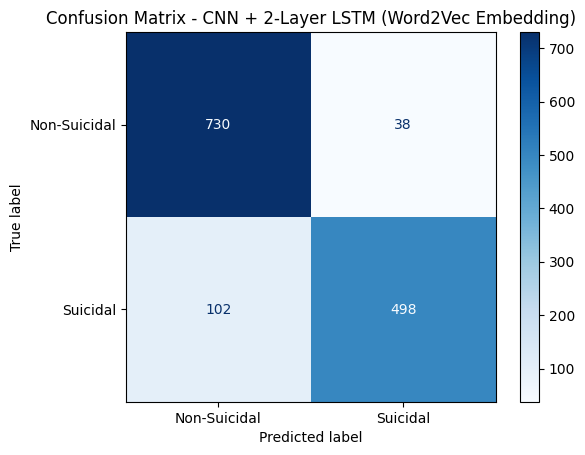

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


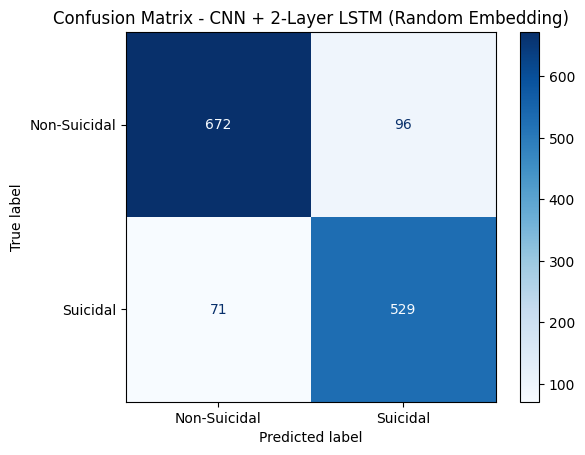

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion(model, X_test, y_test, model_name):
    y_pred_probs = model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Suicidal', 'Suicidal'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.grid(False)
    plt.show()

# ----------------------------------------
# Plot Confusion Matrix for Word2Vec Model
plot_confusion(model_3a, X_test, y_test, "CNN + 2-Layer LSTM (Word2Vec Embedding)")

# Plot Confusion Matrix for Random Embedding Model
plot_confusion(model_3b, X_test, y_test, "CNN + 2-Layer LSTM (Random Embedding)")


##### **Compare Results**

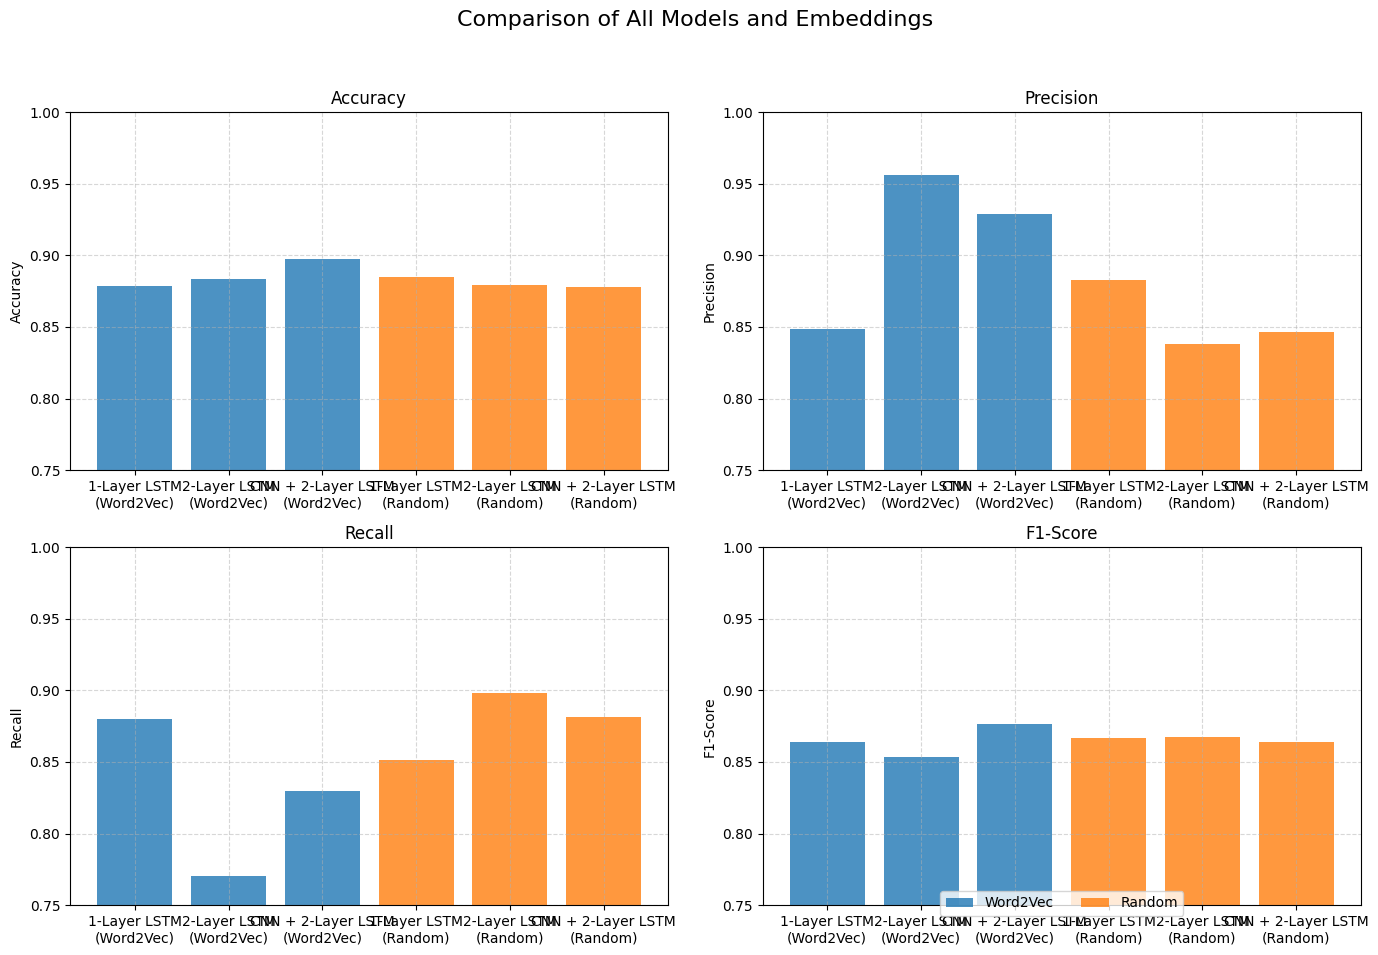

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data
data = {
    "Model": [
        "1-Layer LSTM", "1-Layer LSTM",
        "2-Layer LSTM", "2-Layer LSTM",
        "CNN + 2-Layer LSTM", "CNN + 2-Layer LSTM"
    ],
    "Embedding": [
        "Word2Vec", "Random",
        "Word2Vec", "Random",
        "Word2Vec", "Random"
    ],
    "Accuracy": [0.8787, 0.8852, 0.8838, 0.8794, 0.8977, 0.8779],
    "Precision": [0.8489, 0.8826, 0.9565, 0.8383, 0.9291, 0.8464],
    "Recall": [0.8800, 0.8517, 0.7700, 0.8983, 0.8300, 0.8817],
    "F1-Score": [0.8642, 0.8668, 0.8532, 0.8673, 0.8768, 0.8637]
}

df = pd.DataFrame(data)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#1f77b4', '#ff7f0e']

for ax, metric in zip(axs.ravel(), metrics):
    for i, embedding in enumerate(['Word2Vec', 'Random']):
        filtered = df[df['Embedding'] == embedding]
        ax.bar(
            [f"{m}\n({embedding})" for m in filtered['Model']],
            filtered[metric],
            label=embedding if metric == 'Accuracy' else "",
            color=colors[i],
            alpha=0.8
        )
    ax.set_title(metric)
    ax.set_ylim(0.75, 1.0)
    ax.set_ylabel(metric)
    ax.grid(True, linestyle='--', alpha=0.5)

plt.suptitle("Comparison of All Models and Embeddings", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.legend(["Word2Vec", "Random"], loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.show()


**1-Layer LSTM**

| Metric       | Word2Vec     | Random       |
|--------------|--------------|--------------|
| Accuracy     | 0.8787       | 0.8852       |
| Precision    | 0.8489       | 0.8826       |
| Recall       | 0.8800       | 0.8517       |
| F1-Score     | 0.8642       | 0.8668       |

---

**2-Layer LSTM**

| Metric       | Word2Vec     | Random       |
|--------------|--------------|--------------|
| Accuracy     | 0.8838       | 0.8794       |
| Precision    | 0.9565       | 0.8383       |
| Recall       | 0.7700       | 0.8983       |
| F1-Score     | 0.8532       | 0.8673       |

---

**CNN + 2-Layer LSTM**

| Metric       | Word2Vec     | Random       |
|--------------|--------------|--------------|
| Accuracy     | 0.8977       | 0.8779       |
| Precision    | 0.9291       | 0.8464       |
| Recall       | 0.8300       | 0.8817       |
| F1-Score     | 0.8768       | 0.8637       |

---

**Insights:**

- **Best Accuracy:**  
  📌 CNN + 2-Layer LSTM (Word2Vec) = **0.8977**

- **Best F1-Score:**  
  📌 CNN + 2-Layer LSTM (Word2Vec) = **0.8768**  
  📌 2-Layer LSTM (Random) = **0.8673**

- **Best Precision:**  
  📌 2-Layer LSTM (Word2Vec) = **0.9565**  
  (very confident, but lower recall)

- **Best Recall:**  
  📌 2-Layer LSTM (Random) = **0.8983**

---

**Final Thoughts:**

- If we care more about **balanced performance**:  
  → **CNN + 2-Layer LSTM with Word2Vec** is our best bet.

- If **recall is our priority** (catching more suicidal posts):  
  → Use **2-Layer LSTM with Random Embedding**

- If **precision matters most** (avoiding false alarms):  
  → Use **2-Layer LSTM with Word2Vec**



**Summary**

| Model                       | Embedding  | Accuracy | Precision | Recall | F1-Score |
|----------------------------|------------|----------|-----------|--------|----------|
| 1-Layer LSTM               | Word2Vec   | 0.8787   | 0.8489    | 0.8800 | 0.8642   |
| 1-Layer LSTM               | Random     | 0.8852   | 0.8826    | 0.8517 | 0.8668   |
| 2-Layer LSTM               | Word2Vec   | 0.8838   | 0.9565    | 0.7700 | 0.8532   |
| 2-Layer LSTM               | Random     | 0.8794   | 0.8383    | 0.8983 | 0.8673   |
| CNN + 2-Layer LSTM         | Word2Vec   | 0.8977   | 0.9291    | 0.8300 | 0.8768   |
| CNN + 2-Layer LSTM         | Random     | 0.8779   | 0.8464    | 0.8817 | 0.8637   |


##### **BERT (as Embedding)**

In [ ]:
!pip install transformers
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from transformers import BertTokenizer, TFBertModel


In [ ]:
# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load BERT model (output_hidden_states=True to get embeddings)
bert_model = TFBertModel.from_pretrained('bert-base-uncased')


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# Function to tokenize sentences and pad them
def encode_tweets(texts, max_len=128):
    return tokenizer(
        list(texts),
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )


In [ ]:
# Suppose your cleaned tweets are in 'df['cleaned_tweet']'
# And labels (0/1) are in 'df['intention']'

# Tokenize and encode
encoded_inputs = encode_tweets(df['cleaned_tweet'], max_len=128)

input_ids = encoded_inputs['input_ids']
attention_mask = encoded_inputs['attention_mask']

# Labels
labels = df['intention'].values

In [ ]:
# Convert tensors to numpy arrays first
input_ids_np = input_ids.numpy()
attention_mask_np = attention_mask.numpy()

# Now split properly
X_train_ids, X_test_ids, X_train_mask, X_test_mask, y_train, y_test = train_test_split(
    input_ids_np, attention_mask_np, labels, test_size=0.2, random_state=42
)

# Further split training into train-validation
X_train_ids, X_val_ids, X_train_mask, X_val_mask, y_train, y_val = train_test_split(
    X_train_ids, X_train_mask, y_train, test_size=0.2, random_state=42
)


In [ ]:
def extract_bert_embeddings_batched(input_ids, attention_mask, batch_size=32):
    all_embeddings = []
    for i in range(0, input_ids.shape[0], batch_size):
        batch_ids = tf.convert_to_tensor(input_ids[i:i+batch_size])
        batch_mask = tf.convert_to_tensor(attention_mask[i:i+batch_size])

        outputs = bert_model(batch_ids, attention_mask=batch_mask)
        last_hidden_state = outputs.last_hidden_state  # (batch_size, 128, 768)

        all_embeddings.append(last_hidden_state.numpy())

    return np.vstack(all_embeddings)


In [ ]:
# Extract embeddings batch by batch
X_train_embeddings = extract_bert_embeddings_batched(X_train_ids, X_train_mask)
X_val_embeddings = extract_bert_embeddings_batched(X_val_ids, X_val_mask)
X_test_embeddings = extract_bert_embeddings_batched(X_test_ids, X_test_mask)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten

# Build model
model = Sequential([
    # CNN Part
    Conv1D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(128, 768)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),

    # 1st LSTM Layer
    LSTM(100, return_sequences=True),
    Dropout(0.5),

    # 2nd LSTM Layer
    LSTM(50),
    Dropout(0.5),

    # Output Layer
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 128, 64)        │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 64, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64, 100)        │        66,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,771 (952.23 KB)

 Trainable params: 243,771 (952.23 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history_bert = model.fit(
    X_train_embeddings, y_train,
    validation_data=(X_val_embeddings, y_val),
    epochs=20,
    batch_size=64
)


Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.8369 - loss: 0.3917 - val_accuracy: 0.8835 - val_loss: 0.2498
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9041 - loss: 0.2409 - val_accuracy: 0.8999 - val_loss: 0.2546
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9112 - loss: 0.2117 - val_accuracy: 0.9123 - val_loss: 0.2227
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9268 - loss: 0.1858 - val_accuracy: 0.9075 - val_loss: 0.2266
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9302 - loss: 0.1642 - val_accuracy: 0.9075 - val_loss: 0.2187
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.9379 - loss: 0.1541 - val_accuracy: 0.9082 - val_loss: 0.2377
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9422 - loss: 0.1358 - val_accuracy: 0.9034 - val_loss: 0.2507
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9585 - loss: 0.1203 - val_accuracy: 0.8979 - 

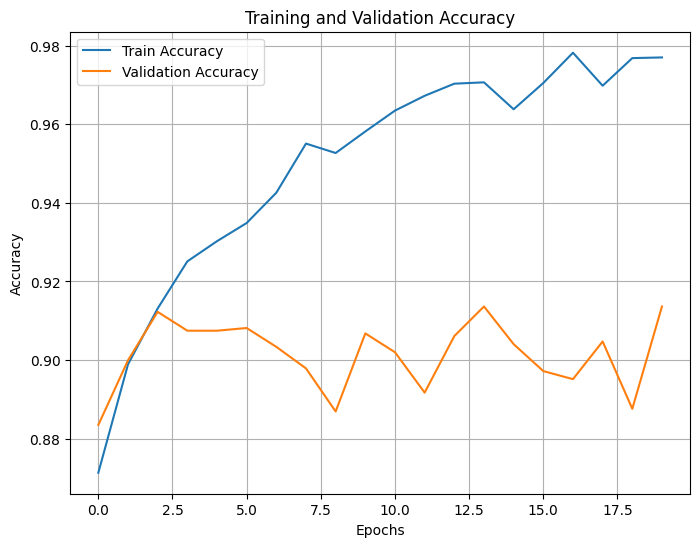

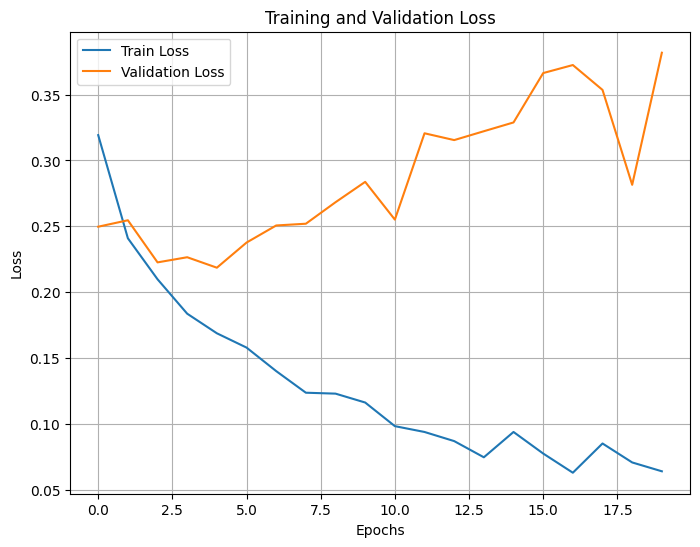

In [ ]:
# Plot Accuracy
plt.figure(figsize=(8,6))
plt.plot(history_bert.history['accuracy'], label='Train Accuracy')
plt.plot(history_bert.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(8,6))
plt.plot(history_bert.history['loss'], label='Train Loss')
plt.plot(history_bert.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Predict
y_pred_probs = model.predict(X_test_embeddings)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print("\n📌 Evaluation for CNN + 2-Layer LSTM (BERT Embedding):")
print(f"✔️ Accuracy:  {acc:.4f}")
print(f"✔️ Precision: {prec:.4f}")
print(f"✔️ Recall:    {rec:.4f}")
print(f"✔️ F1-Score:  {f1:.4f}")


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

📌 Evaluation for CNN + 2-Layer LSTM (BERT Embedding):
✔️ Accuracy:  0.9123
✔️ Precision: 0.9194
✔️ Recall:    0.8783
✔️ F1-Score:  0.8983


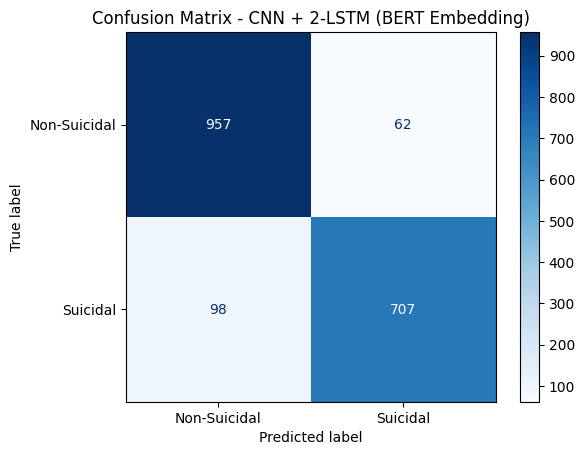

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Suicidal', 'Suicidal'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - CNN + 2-LSTM (BERT Embedding)')
plt.grid(False)
plt.show()


**Final Evaluation Table**

| Model                                | Embedding     | Accuracy | Precision | Recall | F1-Score |
|-------------------------------------|---------------|----------|-----------|--------|----------|
| **1-Layer LSTM**                    | Word2Vec      | 0.8787   | 0.8489    | 0.8800 | 0.8642   |
| **1-Layer LSTM**                    | Random        | 0.8852   | 0.8826    | 0.8517 | 0.8668   |
| **2-Layer LSTM**                    | Word2Vec      | 0.8838   | 0.9565    | 0.7700 | 0.8532   |
| **2-Layer LSTM**                    | Random        | 0.8794   | 0.8383    | 0.8983 | 0.8673   |
| **CNN + 2-LSTM**                    | Word2Vec      | 0.8977   | 0.9291    | 0.8300 | 0.8768   |
| **CNN + 2-LSTM**                    | Random        | 0.8779   | 0.8464    | 0.8817 | 0.8637   |
| ✅ **CNN + 2-LSTM**                 | **BERT**      | **0.9123** | **0.9194** | **0.8783** | **0.8983** |

---


- **Best Overall Model**:  
  ✅ **CNN + 2-LSTM with BERT Embedding**  
  → It **outperforms** all others in **accuracy (91.2%)** and **F1-score (89.8%)**, which is critical for balanced performance in detecting suicidal ideation.

- **Runner-Up**:  
  CNN + 2-LSTM with **Word2Vec** is slightly behind, but still solid in generalization.

- **Word2Vec vs Random**:  
  Word2Vec performs **more stably** on validation, especially in more complex architectures.

- **BERT's Power**:  
  Despite being resource-heavy, **BERT embeddings** provide **richer contextual information**, helping the CNN+LSTM model generalize better.

##### **BERT (as Classifier)**

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
228/228 [==============================] - 236s 798ms/step - loss: 0.2651 - accuracy: 0.8921 - val_loss: 0.2550 - val_accuracy: 0.9112
Epoch 2/4
228/228 [==============================] - 178s 782ms/step - loss: 0.1392 - accuracy: 0.9461 - val_loss: 0.1978 - val_accuracy: 0.9320
Epoch 3/4
228/228 [==============================] - 178s 781ms/step - loss: 0.0773 - accuracy: 0.9719 - val_loss: 0.2156 - val_accuracy: 0.9243
Epoch 4/4
29/29 [==============================] - 11s 261ms/step

📌 Evaluation on Test Set:
✔️ Accuracy:  0.9561
✔️ Precision: 0.9615
✔️ Recall:    0.9375
✔️ F1-Score:  0.9494


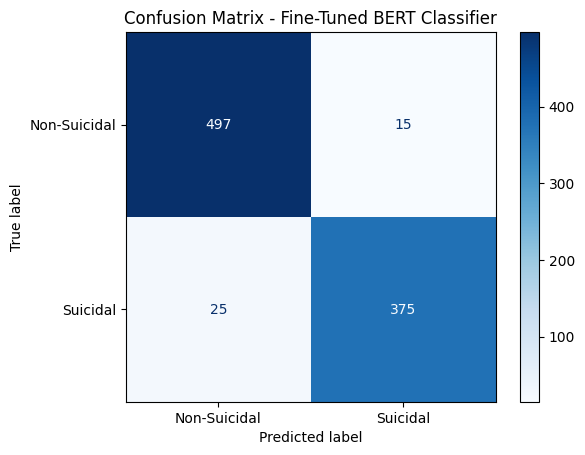

In [ ]:
# 1. Install necessary libraries
!pip install -q transformers

# 2. Import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from transformers import TFBertForSequenceClassification, BertTokenizer

# 3. Prepare the data
X = df['cleaned_tweet'].tolist()  # Cleaned tweets
y = df['intention'].values        # Labels (0/1)

# 4. Split into train/val/test
X_train_texts, X_temp_texts, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val_texts, X_test_texts, y_val, y_test = train_test_split(X_temp_texts, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 5. Load BERT tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)

# 6. Tokenize texts
train_encodings = tokenizer(list(X_train_texts), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(list(X_val_texts), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(X_test_texts), truncation=True, padding=True, max_length=128)

# 7. Create tf.data.Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
)).batch(32)

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    y_val
)).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
)).batch(32)

# 8. Load BERT model for sequence classification
bert_classifier = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# 9. Compile model
bert_classifier.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# 10. Fine-tune the model
history = bert_classifier.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=4
)

# 11. Evaluate on test set
preds = bert_classifier.predict(test_dataset)
y_pred = tf.math.argmax(preds.logits, axis=1).numpy()

# 12. Metrics
print("\n📌 Evaluation on Test Set:")
print(f"✔️ Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"✔️ Precision: {precision_score(y_test, y_pred):.4f}")
print(f"✔️ Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"✔️ F1-Score:  {f1_score(y_test, y_pred):.4f}")

# 13. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Suicidal', 'Suicidal'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Fine-Tuned BERT Classifier')
plt.grid(False)
plt.show()

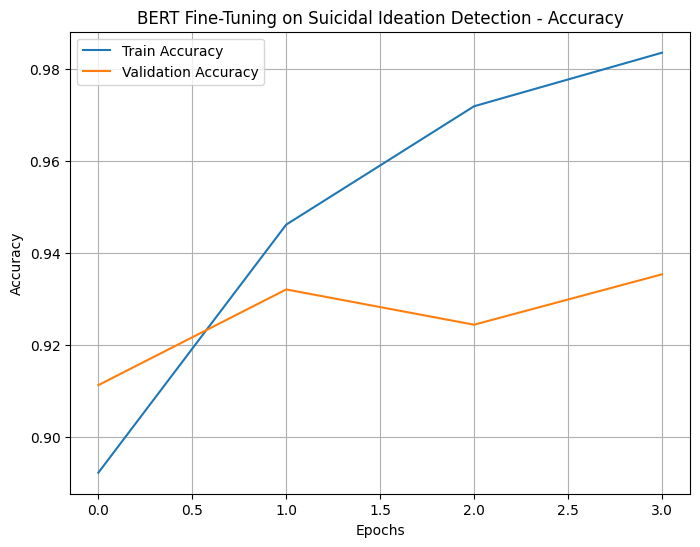

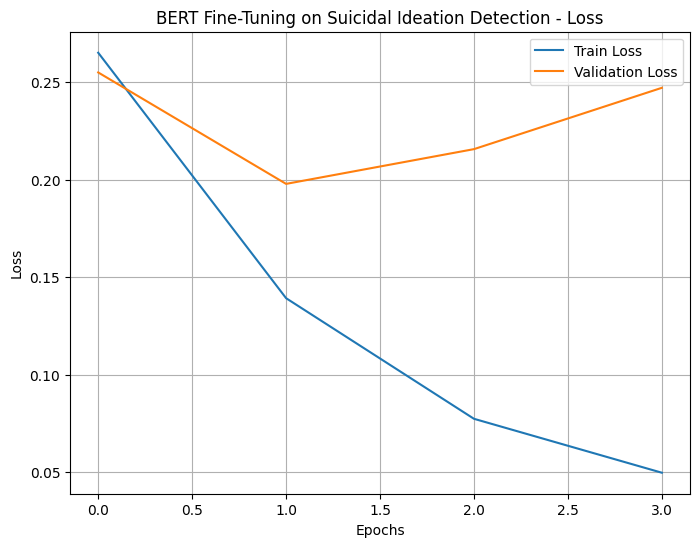

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name="BERT Fine-Tuning"):
    # Accuracy Plot
    plt.figure(figsize=(8,6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Loss Plot
    plt.figure(figsize=(8,6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(history, model_name="BERT Fine-Tuning on Suicidal Ideation Detection")

##### **Final Comparison**

**Comparison of All Models**

| Model | Embedding | Accuracy | Precision | Recall | F1-Score |
|:------|:----------|:---------|:----------|:-------|:---------|
| 1-Layer LSTM | Word2Vec | 0.8787 | 0.8489 | 0.8800 | 0.8642 |
| 1-Layer LSTM | Random | 0.8852 | 0.8826 | 0.8517 | 0.8668 |
| 2-Layer LSTM | Word2Vec | 0.8838 | 0.9565 | 0.7700 | 0.8532 |
| 2-Layer LSTM | Random | 0.8794 | 0.8383 | 0.8983 | 0.8673 |
| CNN + 2-Layer LSTM | Word2Vec | 0.8977 | 0.9291 | 0.8300 | 0.8768 |
| CNN + 2-Layer LSTM | Random | 0.8779 | 0.8464 | 0.8817 | 0.8637 |
| CNN + 2-Layer LSTM | BERT | 0.9123 | 0.9194 | 0.8783 | 0.8983 |
| **Fine-Tuned BERT** | **BERT** | **0.9561** | **0.9615** | **0.9375** | **0.9494** |

---

**Observations**
- ✅ **Best performance** is by **Fine-Tuned BERT** (Accuracy = **95.61%**, F1-Score = **94.94%**).
- ✅ Using **BERT embeddings** (even without fine-tuning) in CNN+2LSTM **improved** performance compared to Word2Vec/Random embeddings.
- ✅ Simple 2-layer LSTM models with Word2Vec/Random were good but not as strong as CNN + LSTM models.
- ✅ **Fine-tuning BERT end-to-end** is **superior** to using static embeddings.


**Final Ranking**

1. **Fine-Tuned BERT Classifier** (best by far)
2. **CNN + 2-Layer LSTM with BERT Embedding**
3. **CNN + 2-Layer LSTM with Word2Vec**
4. **Others (1-layer LSTM, 2-layer LSTM, Random Embeddings)**

